**Parkyze**

In [10]:
import matplotlib.pyplot as py
import math as m
import parkyzeClass as pc
import numpy as np
import shapely.geometry
import random
import modele as md

Initialisation d'un parking

In [2]:
#Les points qui consituent notre espace de travail
espace = pc.EspaceDeTravail([(-20,-70), (-20,20), (30,20), (30,-70), (-20,-70)])
#La rampe d'où on va dans le parking, on lui définit sa longueur, puis sa largeur, puis sa position de départ, ensuite son angle par rapport à la droite et enfin une hauteur de rampe
rampe = pc.Rampe(14, 5, [-25,10], 0, 2)
parking = pc.Parking(rampe, espace)

Modèle standard numéro 1

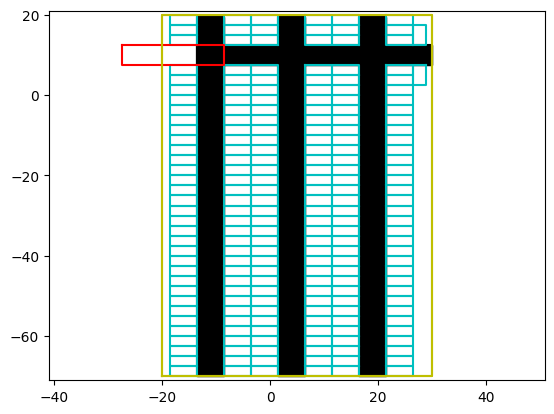

0

In [3]:
parking1 = parking.copy()
md.remplissageAutoParkingStandard1(parking1, 5, 5, 2.5)

parking1.affichage()

Modèle standard numéro 2

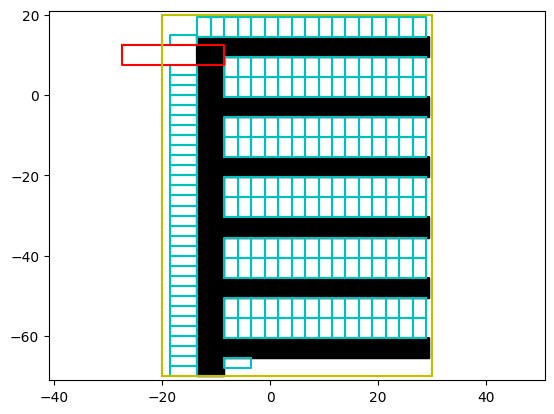

0

In [4]:
parking2 = parking.copy()
md.remplissageAutoParkingStandard2(parking2, 5, 5, 2.5)

parking2.affichage()

Modèle standard numéro 3

[<parkyzeClass.Route object at 0x0000016BE9F93700>, <parkyzeClass.Route object at 0x0000016BE9F938B0>, False]


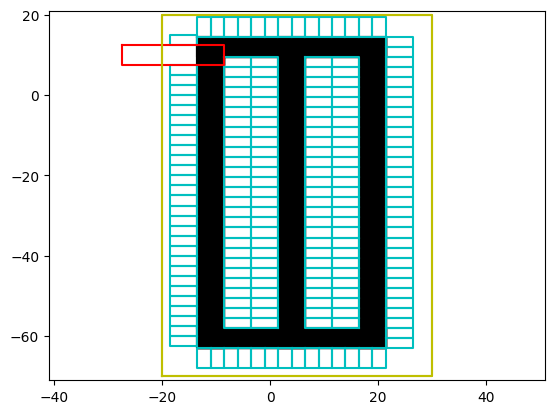

0

In [5]:
parking3 = parking.copy()
parking3 = md.remplissageAutoParkingStandard3(parking3, 5, 5, 2.5)

parking3.affichage()

Modèle standard numéro 4

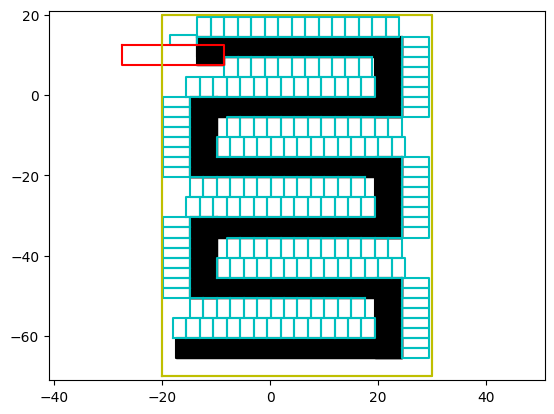

0

In [6]:
parking4 = parking.copy()
md.remplissageAutoParkingStandard4(parking4, 5, 5, 2.5)

parking4.affichage()

Modèle aléatoire

-180.0
180.0


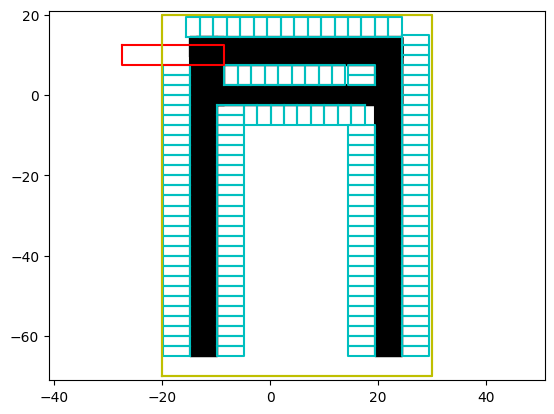

0

In [7]:
parking5 = parking.copy()
md.remplissageAleatoire(parking5, 5, 5, 2.5)

parking5.affichage()

Modèle génétique

[0]
[166.98499999999999, 155.28499999999997]
[169.46, 166.98499999999999]
[177.70999999999998, 174.70999999999998]
[196.73499999999999, 178.27800000000002]
[196.81, 196.735]
[196.81, 197.2225]
[197.2225, 197.2225]
[200.04749999999999, 197.2225]
[200.04749999999999, 200.04749999999999]
200.04749999999999


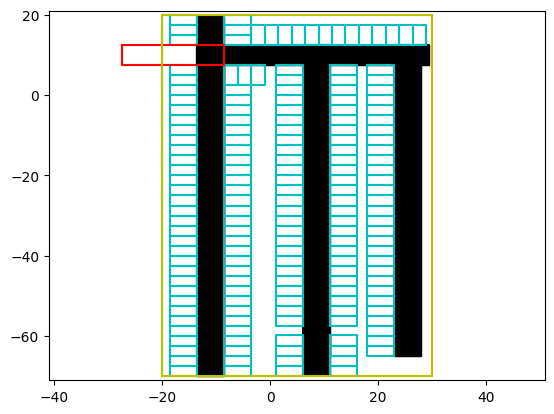

0

In [8]:
parking6 = parking.copy()
parkingAuto = md.remplissageAutomatique2(parking6, 5, 5, 2.5)

parkingAuto.affichage()

Modèle génétique sur un parking singulier 

[0]
[142.585, 137.81]
[151.83500000000004, 152.235]
[154.803, 156.685]
[159.571, 157.253]
[159.571, 159.571]
[162.67100000000002, 159.571]
[163.071, 162.67100000000002]
[163.071, 163.52100000000002]
[163.52100000000002, 163.52100000000002]
163.52100000000002


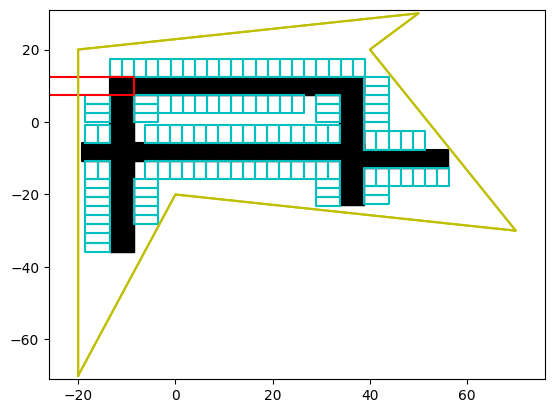

0

In [9]:
espace2 = pc.EspaceDeTravail([(-20,-70), (-20,20), (50,30), (40,20), (70, -30),(0, -20), (-20,-70)])
rampe2 = pc.Rampe(14, 5, [-25,10], 0, 2)
parking6 = pc.Parking(rampe2, espace2)
parkingAuto = md.remplissageAutomatique2(parking6, 5, 5, 2.5)

parkingAuto.affichage()